# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Your code here. 
student_data = pd.DataFrame({'age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'Number of Tardies')

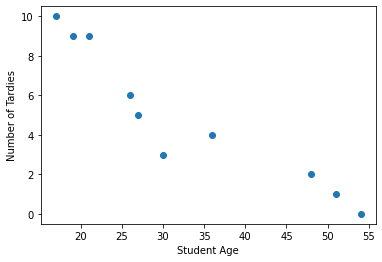

In [3]:
# Your code here.
plt.scatter(x=student_data['age'], y=student_data['tardies'])
plt.xlabel('Student Age')
plt.ylabel('Number of Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 

# It appears that there is a negative correlation between age and tardiness.
# As a student's age increases, the number of tardies decreases.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.

student_data.corr()

# The correlation between age and tardies seems to be very strong, and inversely related.

,age,tardies
age,1.000000,-0.939163
tardies,-0.939163,1.000000


In [6]:
# student_data.cov?

In [7]:
student_data.cov()

# The covariance between the two variables seems to be negatively related, but strong. 
# Which means that as one changes, the other changes with it?

,age,tardies
age,187.655556,-45.566667
tardies,-45.566667,12.544444


In [8]:
# note: numpy correlation and covariance from this link: https://www.geeksforgeeks.org/python-numpy-cov-function/

# Covariance provides the a measure of strength of correlation between two variable or more set of variables. The covariance matrix element Cij is the covariance of xi and xj. The element Cii is the variance of xi.
#     If COV(xi, xj) = 0 then variables are uncorrelated
#     If COV(xi, xj) > 0 then variables positively correlated
#     If COV(xi, xj) > < 0 then variables negatively correlated


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Your response here.
Y = student_data['tardies']
X = student_data['age']
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

# I used OLS regression.
# My outcome variable will be 'tardies' because t statistic and p-value
# ... appear to show a strong explanatory power!


/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           5.57e-05
Time:                        13:23:33   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

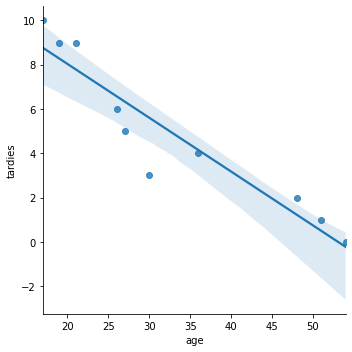

In [10]:
# Your code here.
sns.lmplot(data=student_data, x='age', y='tardies')

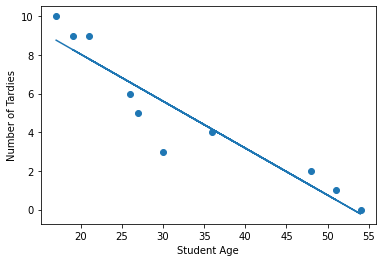

In [11]:
plt.scatter(x=student_data['age'], y=student_data['tardies'])
plt.xlabel('Student Age')
plt.ylabel('Number of Tardies')
plt.plot(student_data.age, results.predict(X)) # from Filipa

In [12]:
results.predict(X)

0    8.760850
1    0.504944
2    6.332643
3    7.789567
4    4.147256
5    1.233406
6    8.275209
7    6.575463
8   -0.223518
9    5.604180
dtype: float64

In [13]:
Y

0    10
1     1
2     5
3     9
4     4
5     2
6     9
7     6
8     0
9     3
Name: tardies, dtype: int64

In [14]:
Y_pred = results.predict(X)

In [15]:
residuals = Y - Y_pred
residuals

0    1.239150
1    0.495056
2   -1.332643
3    1.210433
4   -0.147256
5    0.766594
6    0.724791
7   -0.575463
8    0.223518
9   -2.604180
dtype: float64

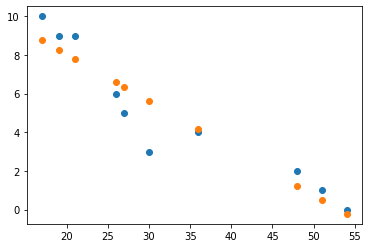

In [16]:
plt.plot(X['age'], Y, 'o')
plt.plot(X['age'], Y_pred, 'o')


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [17]:
# Your response here. 

"""
The relationship between age and tardiness appears to be negative and highly correlated.
This supports the hypothesis that as age increases, tardiness decreases, or that the younger
a student is, the more tardy he/she tends to me. 
The p-value of age appears to be smaller than 5%, and therefore statistically significant. 
"""

'\nThe relationship between age and tardiness appears to be negative and highly correlated.\nThis supports the hypothesis that as age increases, tardiness decreases, or that the younger\na student is, the more tardy he/she tends to me. \nThe p-value of age appears to be smaller than 5%, and therefore statistically significant. \n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [18]:
# Import any libraries you may need & the data

# Libraries all imported above for the previous challenge.
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [27]:
# Your response here. 
vehicles[['CO2 Emission Grams/Mile','Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].corr()['CO2 Emission Grams/Mile']

# subset the correlation df to just show variables' correlation with CO2 Emission Grams/Mile

CO2 Emission Grams/Mile    1.000000
Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
# Your response here. 
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = vehicles['CO2 Emission Grams/Mile'] # Multivariate regression model to describe outcome variable Y.
X = sm.add_constant(X)

model = sm.OLS(Y, X) # use OLS regression model.
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                             13:23:35   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [21]:
# Your response here. 
"""
Looking at the p-values of our variables, they all appear to be statistically significant, as they are all smaller 
than 5%.
However, the variable Fuel Barrels/Year has the largest t-statistic and may be the variable with 
the highest explanatory power?
"""

'\nLooking at the p-values of our variables, they all appear to be statistically significant, as they are all smaller \nthan 5%.\nHowever, the variable Fuel Barrels/Year has the largest t-statistic and may be the variable with \nthe highest explanatory power?\n'

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [29]:
# Your code here. 

guests = pd.DataFrame({'invited': [1,3,4,6,8,9,11,14], 'attended': [1,2,4,4,5,7,8,13]})
guests

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


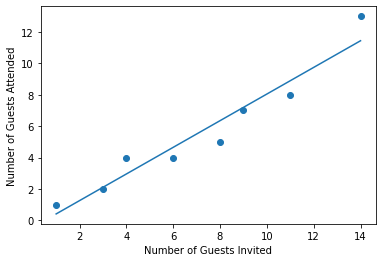

In [33]:
# Your code here.
Y = guests['attended']
X = guests['invited']
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
results.summary()

plt.scatter(x=guests['invited'], y=guests['attended'])
plt.xlabel('Number of Guests Invited')
plt.ylabel('Number of Guests Attended')
plt.plot(guests.invited, results.predict(X))

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [24]:
# Your response here. 

# it appears that there is a strong positive correlation between the number of guests invited to a party and the number of 
# ... guests who attended. 
# The thought that the more guests invited to a party, the more are unable to attend does not appear to be true. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

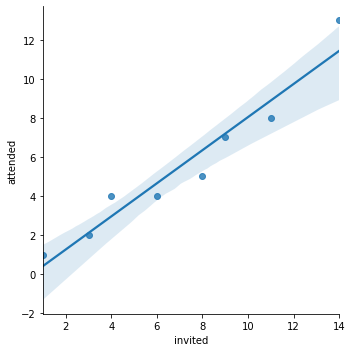

In [34]:
# Your response here. 
sns.lmplot(data=guests, x='invited', y='attended')
# does this help to visualize potential outliers? 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [26]:
# Your response here. 